In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [23]:
def preprocess(data,I,J):
    N_paths = 0
    if I != 0:
        if data[I-1,J] in ['7','|','F']:
            N_paths += 1
    if I != len(data)-1:
        if data[I+1,J] in ['J','|','L']:
            N_paths += 1
    if J != 0:
        if data[I,J-1] in ['L','-','F']:
            N_paths += 1
    if J != len(data[I])-1:
        if data[I,J+1] in ['J','-','7']:
            N_paths += 1
    return N_paths

def S_key(data,I,J):
    new_key = ''
    if I != 0:
        if data[I-1,J] in ['7','|','F']:
            new_key += 'N'
    if J != len(data[I])-1:
        if data[I,J+1] in ['J','-','7']:
            new_key += 'E'
    if I != len(data)-1:
        if data[I+1,J] in ['J','|','L']:
            new_key += 'S'
    if J != 0:
        if data[I,J-1] in ['L','-','F']:
            new_key += 'W'
    return new_key
def north(i,j):
    return i-1,j #if i!=0 else None
def east(i,j):
    return i,j+1 #if j!=len(data[i])-1 else None
def south(i,j):
    return i+1,j #if i!=len(data)-1 else None
def west(i,j):
    return i,j-1 #if j!=0 else None

direction_keys = ['N','E','S','W']
direction_funcs = {}
direction_fits = {}
mapping = {}
for key,func,fits,dirs in zip(direction_keys,
                              [north,east,south,west],
                              [['7','|','F'],['J','-','7'],['J','|','L'],['L','-','F']],
                              [['W','N','E'],['N','E','S'],['W','S','E'],['N','W','S']]):
    direction_funcs[key] = func
    direction_fits[key] = fits
    mapping [key] = {}
    for subkey, direction in zip(fits, dirs):
        mapping[key][subkey] = direction



def step_one(data,start):
    for key in direction_keys:
        next= direction_funcs[key](start[0],start[1])
        if data[next] in direction_fits[key]:
            return next, key

def step(data,current,prev_move):
    new_move = mapping[prev_move][data[current]]
    return direction_funcs[new_move](current[0],current[1]), new_move


def walk(data,start):
    positions = []
    N = 1
    positions.append(start)
    curr, prev_move = step_one(data,start)
    positions.append(curr)
    while data[curr] != 'S':
        next, prev_move = step(data,curr,prev_move)
        curr = next
        positions.append(curr)
        N += 1
    return int(N/2), positions

assumption is correct:  True
part1 result:  6860


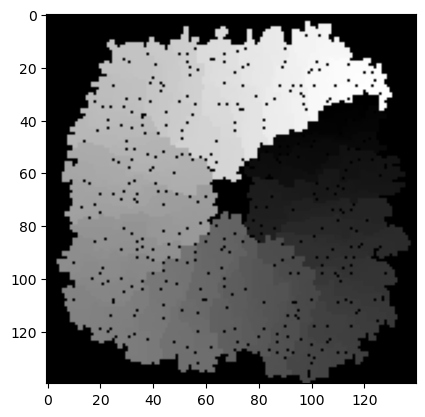

In [50]:
filename = 'input'
file = open(filename+'.txt')

data = np.array([[char for char in line.removesuffix('\n')] for line in file.readlines()])
I,J = np.where(data=='S')
I = I[0]
J = J[0]

print("assumption is correct: ",preprocess(data,I,J)==2)

res1, indices = walk(data,(I,J))

print('part1 result: ', res1)
im = np.zeros(shape = data.shape)

n = 1
for index in indices:
    im[index] = n
    n+=1 
plt.gray()
plt.imshow(im)

replace = {}
replace['ES'] = 'F'
replace['EW'] = '-'

data[I,J] = replace[S_key(data,I,J)]

count_left = np.zeros_like(im)
for i in range(len(count_left)):
    count = 0
    doubt = False
    starter = ''
    for j in range(len(count_left[0])):
        if doubt:
            match starter:
                case 'F':
                    if data[i,j] == '7':
                        doubt = False
                    elif data[i,j] == 'J':
                        doubt = False
                        count += 1
                case 'L':
                    if data[i,j] == 'J':
                        doubt = False
                    elif data[i,j] == '7':
                        doubt = False
                        count += 1
        else:
            if (i,j) in indices:
                count_left[i,j] = 0
                if data[i,j] in 'FL':
                    doubt = True
                    starter = data[i,j]
                elif data[i,j] == '|':
                    count += 1
            else:
                count_left[i,j] = count


343


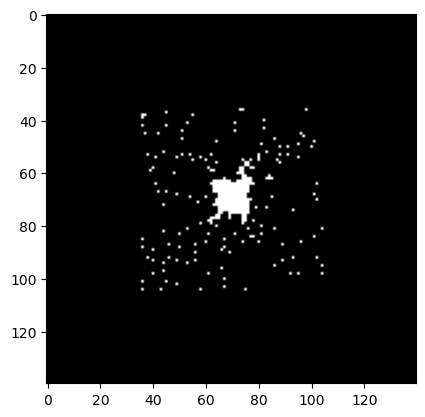

In [51]:
plt.gray()
plt.imshow(count_left%2)
print(np.sum(count_left%2==1))